# Imports/Setup

In [180]:
import os
import sys

import numpy as np

from astropy import units as u
from astropy.table import Table
from astropy.coordinates import SkyCoord

import astroquery

import tqdm

from importlib import reload

%matplotlib inline
from matplotlib import style, pyplot as plt

In [2]:
working_dir = os.path.abspath('..')

%cd ../../saga
sagadir = !pwd
sagadir = sagadir[0]
!python setup.py build
%cd $working_dir

/Users/erik/projects/saga/saga
running build
running build_py
/Users/erik/projects/saga/erik


In [4]:
sagalibdir = os.path.join(sagadir, 'build/lib')
print('Adding', sagalibdir, 'to the python path')
sys.path.insert(0, sagalibdir)

import SAGA as saga
from SAGA.databsase import 

Adding /Users/erik/projects/saga/saga/build/lib to the python path


In [7]:
saga_database = saga.Database(os.path.join(os.environ['HOME'],'Dropbox/SAGA/'), working_dir)
saga_field_catalog = saga.FieldCatalog(saga_database)
saga_object_catalog = saga.ObjectCatalog(saga_database, saga.FieldCatalog)

# Get Data

## DES Catalogs 

In [21]:
fields = saga_field_catalog.load()

failed = saga.database.download_catalogs_for_hosts(fields, saga.database.DesQuery, 
                                                   saga_database.des_file_path_pattern, 
                                                   overwrite=False, host_id_label='field_id')
print('# failed =', np.count_nonzero(failed))

[07/17 23:56:34] Getting catalog for host Phoenix_2 ...
[07/17 23:56:47] Getting catalog for host Phoenix_4 ...
[07/17 23:56:59] Getting catalog for host Phoenix_5 ...
[07/17 23:57:14] Getting catalog for host Indus_2 ...
[07/17 23:57:14] Getting catalog for host Indus_3 ...
[07/17 23:57:14] Getting catalog for host Indus_6 ...
[07/17 23:57:14] Getting catalog for host Indus_7 ...
[07/17 23:57:14] Getting catalog for host Jhelum_7 ...
[07/17 23:57:14] Getting catalog for host Jhelum_8 ...
[07/17 23:57:14] Getting catalog for host Jhelum_9 ...
[07/17 23:57:14] Getting catalog for host Ravi_1 ...
[07/17 23:57:14] Getting catalog for host Ravi_4 ...
[07/17 23:57:14] Getting catalog for host Ravi_7 ...
[07/17 23:57:14] Getting catalog for host Chenab_1 ...
[07/17 23:57:14] Getting catalog for host Chenab_2 ...
[07/17 23:57:14] Getting catalog for host Chenab_8 ...
[07/17 23:57:14] Getting catalog for host Elqui_1 ...
[07/17 23:57:14] Getting catalog for host Elqui_2 ...
[07/17 23:57:14] Ge

## Gaia Catalogs 

First we create async objects for *every* one of these fields

In [24]:
fields

Name1,Name2,field_id,RA,Dec,priority,coord
,,,,,,"deg,deg"
str11,int64,str13,float64,float64,str1,object
Phoenix,2,Phoenix_2,26.574582,-45.317191,h,"26.574582,-45.317191"
Phoenix,4,Phoenix_4,24.475886,-49.054701,h,"24.475886,-49.054701"
Phoenix,5,Phoenix_5,23.305174,-50.907683,h,"23.305174,-50.907683"
Indus,2,Indus_2,345.943921,-63.072259,h,"345.943921,-63.072259"
Indus,3,Indus_3,342.498212,-61.862007,h,"342.498212,-61.862007"
Indus,6,Indus_6,333.69983,-57.793235,h,"333.69983,-57.793235"
Indus,7,Indus_7,331.210691,-56.320561,h,"331.210691,-56.320561"
Jhelum,7,Jhelum_7,344.561594,-50.919723,h,"344.561594,-50.919723"


In [232]:
from astroquery.gaia import Gaia

from getpass import getpass

Gaia.login(input('username:'), getpass('pw:'))

In [96]:
# this hides the warnings from parsing VOTables from Gaia

import warnings
from astropy.io.votable.exceptions import VOTableSpecWarning

warnings.simplefilter('ignore', VOTableSpecWarning)

In [235]:
gaiajobs = {}
for field in fields:
    fnm = field['field_id']
    fn = 'external_catalogs/astrometric/{}_gaia.ecsv'.format(fnm)
    if os.path.exists(fn):
        print('File', fn, 'exists, skipping.')
        continue
    else:
        print('Starting job for', fnm)
    gaiajob = Gaia.cone_search_async(field['coord'], radius=1*u.deg, background=True)
    gaiajobs[fnm] = gaiajob

File external_catalogs/astrometric/Phoenix_2_gaia.ecsv exists, skipping.
File external_catalogs/astrometric/Phoenix_4_gaia.ecsv exists, skipping.
File external_catalogs/astrometric/Phoenix_5_gaia.ecsv exists, skipping.
Starting job for Indus_2
Starting job for Indus_3
Starting job for Indus_6
Starting job for Indus_7
Starting job for Jhelum_7
Starting job for Jhelum_8
Starting job for Jhelum_9
Starting job for Ravi_1
Starting job for Ravi_4
Starting job for Ravi_7
Starting job for Chenab_1
Starting job for Chenab_2
Starting job for Chenab_8
Starting job for Elqui_1
Starting job for Elqui_2
Starting job for Elqui_3
Starting job for Elqui_5
Starting job for Aliqa_Uma_2
Starting job for Aliqa_Uma_3
Starting job for Aliqa_Uma_4
Starting job for Aliqa_Uma_5
Starting job for Willka_Yaku_1
Starting job for Willka_Yaku_2
Starting job for Indus_8
Starting job for Indus_9
Starting job for Indus_10
Starting job for Jhelum_1
Starting job for Jhelum_4
Starting job for Jhelum_5
Starting job for Jhel

In [236]:
#check phases
nqueued = 0
ncompleted = 0
nother = 0
for nm, job in gaiajobs.items():
    ph = job.get_phase(True)
    print(nm, job.get_jobid(), ph)
    if ph == 'QUEUED':
        nqueued += 1
    elif ph == 'COMPLETED':
        ncompleted += 1
    else:
        nother +=1
nall = nqueued + ncompleted + nother
print('q:{:%}, c:{:%}, o:{:%}'.format(nqueued/nall, ncompleted/nall, nother/nall))

Indus_2 1531923850903O COMPLETED
Indus_3 1531923851515O COMPLETED
Indus_6 1531923852140O COMPLETED
Indus_7 1531923852761O COMPLETED
Jhelum_7 1531923853875O COMPLETED
Jhelum_8 1531923854479O COMPLETED
Jhelum_9 1531923855091O COMPLETED
Ravi_1 1531923855787O COMPLETED
Ravi_4 1531923856422O COMPLETED
Ravi_7 1531923857985O COMPLETED
Chenab_1 1531923858605O COMPLETED
Chenab_2 1531923859232O COMPLETED
Chenab_8 1531923859833O COMPLETED
Elqui_1 1531923860444O COMPLETED
Elqui_2 1531923861862O COMPLETED
Elqui_3 1531923862488O COMPLETED
Elqui_5 1531923863088O COMPLETED
Aliqa_Uma_2 1531923863702O COMPLETED
Aliqa_Uma_3 1531923864334O COMPLETED
Aliqa_Uma_4 1531923865933O COMPLETED
Aliqa_Uma_5 1531923866439O COMPLETED
Willka_Yaku_1 1531923866961O COMPLETED
Willka_Yaku_2 1531923867479O COMPLETED
Indus_8 1531923867980O COMPLETED
Indus_9 1531923868494O COMPLETED
Indus_10 1531923869904O COMPLETED
Jhelum_1 1531923870401O COMPLETED
Jhelum_4 1531923871020O COMPLETED
Jhelum_5 1531923871630O COMPLETED
Jhelum_6

In [238]:
saved = []

In [239]:
with tqdm.tqdm_notebook(total=len(gaiajobs)) as pbar:
    nq = 1
    while nq > 0 and len(saved)< len(gaiajobs):
        print('\r', end='')
        print('still have {} queued and {} saved of {} ... sleeping'.format(nq, len(saved), len(gaiajobs)), end='')
        time.sleep(60)
        bar.unpause()
        
        nq = 0
        for fnm, job in gaiajobs.items():
            ph = job.get_phase(True)
            if ph == 'COMPLETED' and fnm not in saved:
                print('\r', end='')
                print('Loading', fnm, end=' ... ')
                gaia_data = job.get_data()
                fn = 'external_catalogs/astrometric/{}_gaia.ecsv'.format(fnm)
                print('Writing', fnm, 'to', fn)
                gaia_data.write(fn, format='ascii.ecsv')
                saved.append(fnm)
                pbar.update(1)
            elif ph =='QUEUED':
                nq += 1

HBox(children=(IntProgress(value=0, max=86), HTML(value='')))

Loading Indus_2 ... Writing Indus_2 to external_catalogs/astrometric/Indus_2_gaia.ecsv
Loading Indus_3 ... Writing Indus_3 to external_catalogs/astrometric/Indus_3_gaia.ecsv
Loading Indus_6 ... Writing Indus_6 to external_catalogs/astrometric/Indus_6_gaia.ecsv
Loading Indus_7 ... Writing Indus_7 to external_catalogs/astrometric/Indus_7_gaia.ecsv
Loading Jhelum_7 ... Writing Jhelum_7 to external_catalogs/astrometric/Jhelum_7_gaia.ecsv
Loading Jhelum_8 ... Writing Jhelum_8 to external_catalogs/astrometric/Jhelum_8_gaia.ecsv
Loading Jhelum_9 ... Writing Jhelum_9 to external_catalogs/astrometric/Jhelum_9_gaia.ecsv
Loading Ravi_1 ... Writing Ravi_1 to external_catalogs/astrometric/Ravi_1_gaia.ecsv
Loading Ravi_4 ... Writing Ravi_4 to external_catalogs/astrometric/Ravi_4_gaia.ecsv
Loading Ravi_7 ... Writing Ravi_7 to external_catalogs/astrometric/Ravi_7_gaia.ecsv
Loading Chenab_1 ... Writing Chenab_1 to external_catalogs/astrometric/Chenab_1_gaia.ecsv
Loading Chenab_2 ... Writing Chenab_2 to

# Comparisons 

In [241]:
def get_offsets(fieldname, gaiafn, doplot=False, 
                septhresh=1.5*u.arcsec, 
                gaia_magrng=(16, 17), d_matchmag=1,
                biweight=False):
    des_table = saga_database['des', fieldname].read()
    gaia_table = Table.read(gaiafn, format='ascii.ecsv')
    
    dsc = SkyCoord(des_table['ra'], des_table['dec'], unit=u.deg)
    dmag = des_table['r_mag']
    dsc_msk = dsc[(gaia_magrng[0]<dmag)&(dmag<gaia_magrng[1])]
    
    sc = SkyCoord(gaia_table['ra'], gaia_table['dec'], unit=u.deg)
    mag = gaia_table['phot_g_mean_mag']
    sc_msk = sc[((gaia_magrng[0]-d_matchmag)<mag)&(mag<(gaia_magrng[1]+d_matchmag))]
    
    idx, d2d, _ = dsc_msk.match_to_catalog_sky(sc_msk)
    dra = dsc_msk.ra - sc_msk[idx].ra
    dracosdec = dra*np.cos(dsc_msk.dec)
    ddec = dsc_msk.dec - sc_msk[idx].dec
    
    sepmsk = d2d < septhresh
    
    if biweight:
        from astropy.stats import biweight_location as meanfunc
    else:
        meanfunc = np.mean
        
    meanra = meanfunc(dra[sepmsk]).to(u.arcsec)
    meanracosdec = meanfunc(dracosdec[sepmsk]).to(u.arcsec)
    meandec = meanfunc(ddec[sepmsk]).to(u.arcsec)
    
    if doplot:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
        ax1.hist(d2d.arcsec, bins=100)

        ax2.scatter(dra[sepmsk].arcsec, ddec[sepmsk].arcsec, alpha=.4)
        ax2.scatter([0], [0], c='k', s=10)
        ax2.scatter([meanra.value], [meandec.value], c='r', s=10)
        ax2.set_xlim(-septhresh.to(u.arcsec).value, septhresh.to(u.arcsec).value)
        ax2.set_ylim(-septhresh.to(u.arcsec).value, septhresh.to(u.arcsec).value)
        fmt = (meanracosdec.value, meandec.value, 
               np.std(dracosdec[sepmsk]).arcsec, np.std(ddec[sepmsk]).arcsec, 
               np.mean(d2d[sepmsk]).arcsec, np.std(d2d[sepmsk]).arcsec)
        ax2.set_title('$\\Delta \\alpha={:.2f}$ $\\Delta \\delta={:.2f}$ \n $\\sigma_\\alpha={:.2f}, \\sigma_\\delta={:.2f}$ \n $\\mu={:.2f}$ $\\sigma={:.2f}$'.format(*fmt))

        ax1.set_title(fieldname)
    return meanra, meanracosdec, meandec

HBox(children=(IntProgress(value=0, max=89), HTML(value='')))

Offsets for Phoenix_2 are: (<Angle -0.1910693 arcsec>, <Angle -0.13458018 arcsec>, <Angle 0.05450962 arcsec>)
Offsets for Phoenix_4 are: (<Angle -0.26903383 arcsec>, <Angle -0.17650497 arcsec>, <Angle 0.06490215 arcsec>)
Offsets for Phoenix_5 are: (<Angle -0.28473702 arcsec>, <Angle -0.17937578 arcsec>, <Angle 0.08082097 arcsec>)
Offsets for Indus_2 are: (<Angle -0.33242585 arcsec>, <Angle -0.15060137 arcsec>, <Angle 0.12291888 arcsec>)
Offsets for Indus_3 are: (<Angle -0.29625378 arcsec>, <Angle -0.13994897 arcsec>, <Angle 0.1108906 arcsec>)
Offsets for Indus_6 are: (<Angle -0.23352991 arcsec>, <Angle -0.1247752 arcsec>, <Angle 0.12327478 arcsec>)
Offsets for Indus_7 are: (<Angle -0.21063563 arcsec>, <Angle -0.11691608 arcsec>, <Angle 0.12492669 arcsec>)
Offsets for Jhelum_7 are: (<Angle -0.19865142 arcsec>, <Angle -0.12522516 arcsec>, <Angle 0.13676895 arcsec>)
Offsets for Jhelum_8 are: (<Angle -0.15299176 arcsec>, <Angle -0.09720834 arcsec>, <Angle 0.10672879 arcsec>)
Offsets for Jh

/Users/erik/miniconda3/envs/saga3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Offsets for Aliqa_Uma_2 are: (<Angle -0.20431341 arcsec>, <Angle -0.16479223 arcsec>, <Angle 0.0916793 arcsec>)
Offsets for Aliqa_Uma_3 are: (<Angle -0.1980215 arcsec>, <Angle -0.16223959 arcsec>, <Angle 0.09199504 arcsec>)
Offsets for Aliqa_Uma_4 are: (<Angle -0.15658583 arcsec>, <Angle -0.13045091 arcsec>, <Angle 0.07787593 arcsec>)
Offsets for Aliqa_Uma_5 are: (<Angle -0.20169744 arcsec>, <Angle -0.17064339 arcsec>, <Angle 0.07979512 arcsec>)
Offsets for Willka_Yaku_1 are: (<Angle -0.24956714 arcsec>, <Angle -0.12658643 arcsec>, <Angle -0.01830657 arcsec>)
Offsets for Willka_Yaku_2 are: (<Angle -0.36810069 arcsec>, <Angle -0.17540311 arcsec>, <Angle -0.01805521 arcsec>)
Offsets for Indus_8 are: (<Angle -0.17372803 arcsec>, <Angle -0.10008926 arcsec>, <Angle 0.13181119 arcsec>)
Offsets for Indus_9 are: (<Angle -0.18996682 arcsec>, <Angle -0.11381263 arcsec>, <Angle 0.12932578 arcsec>)
Offsets for Indus_10 are: (<Angle -0.15646008 arcsec>, <Angle -0.09716786 arcsec>, <Angle 0.14006166

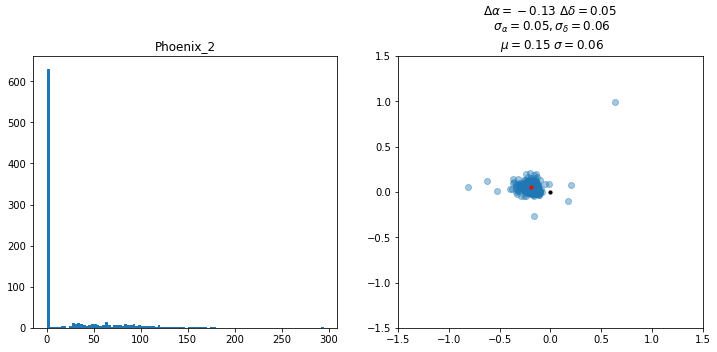

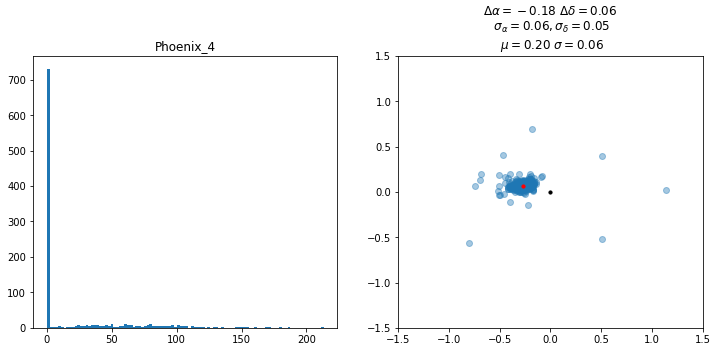

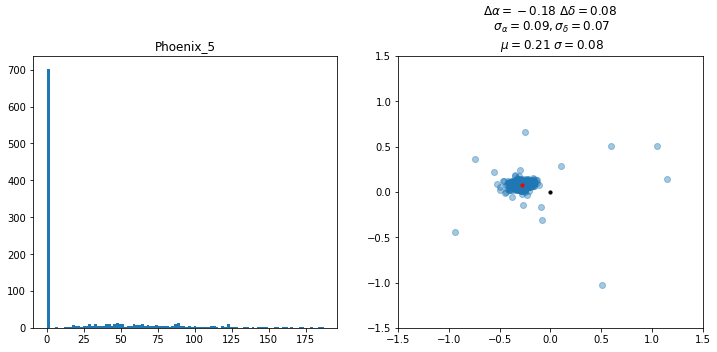

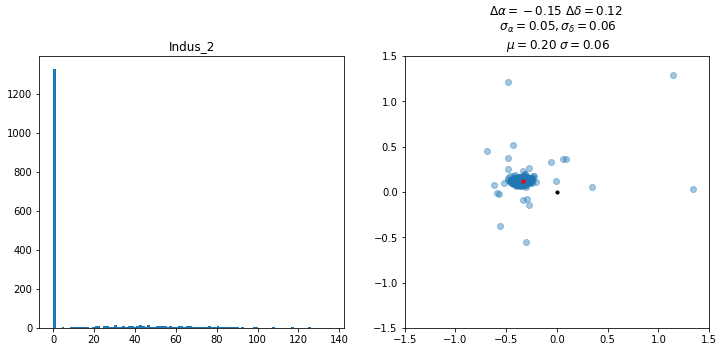

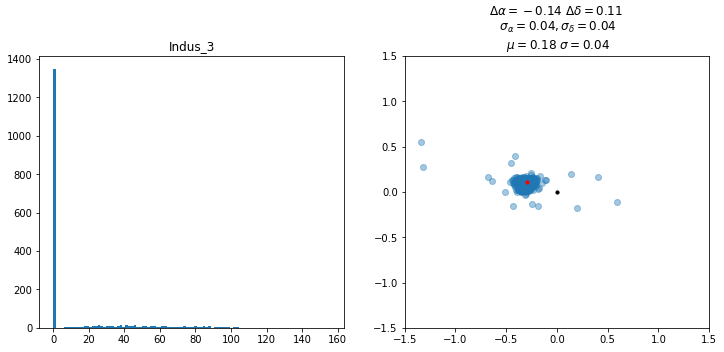

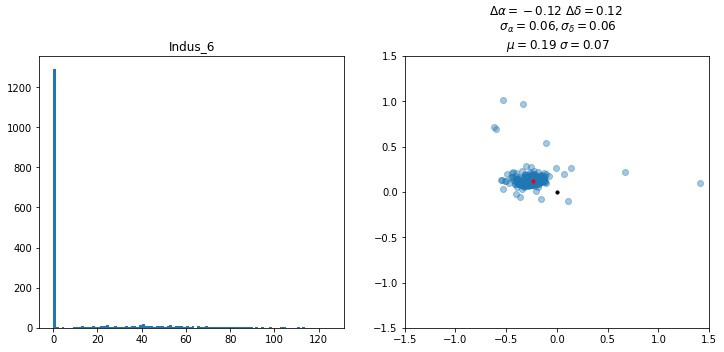

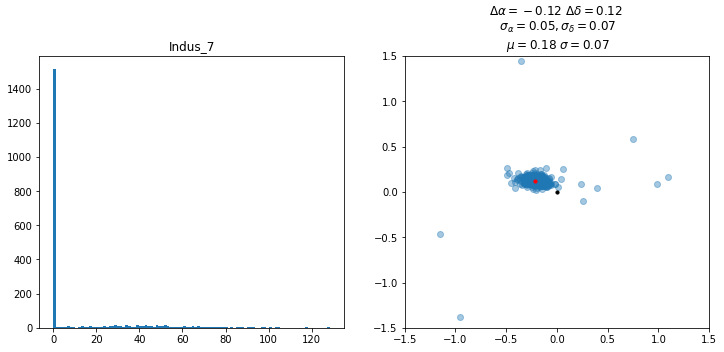

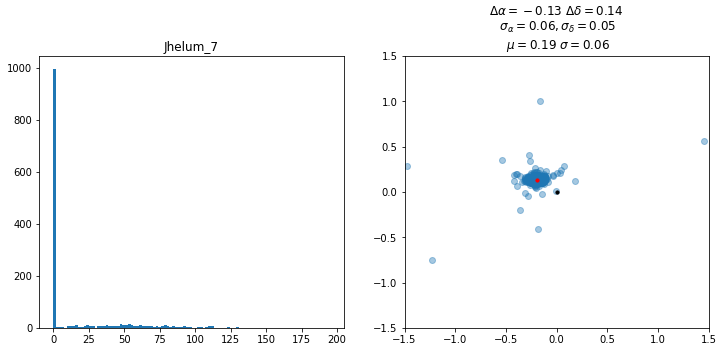

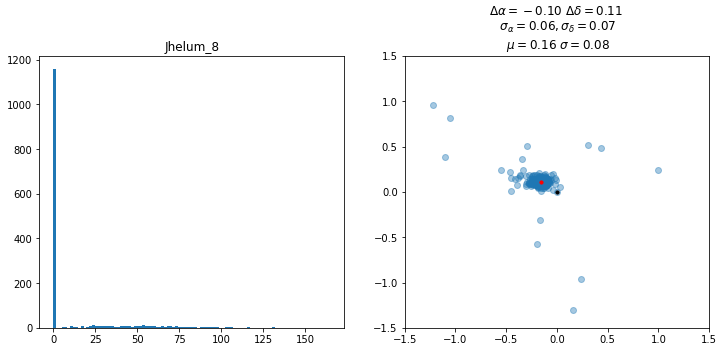

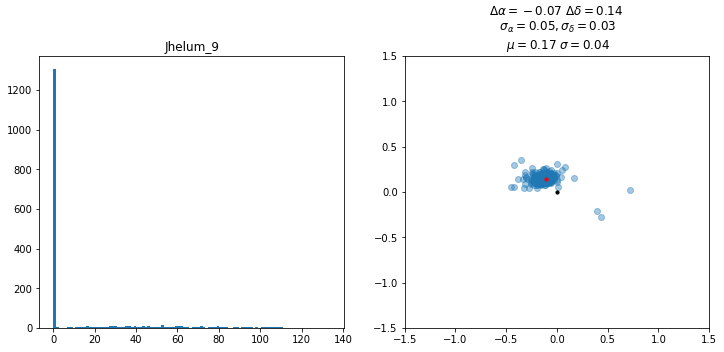

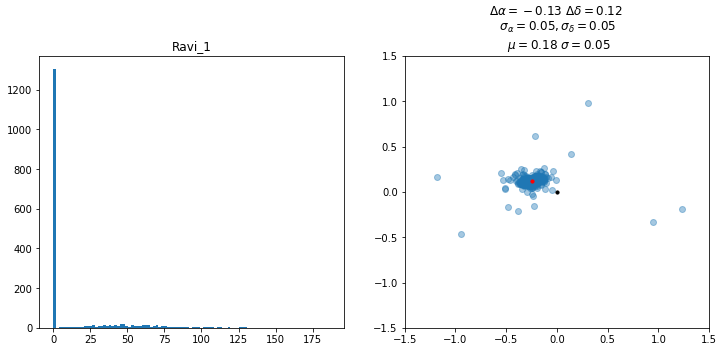

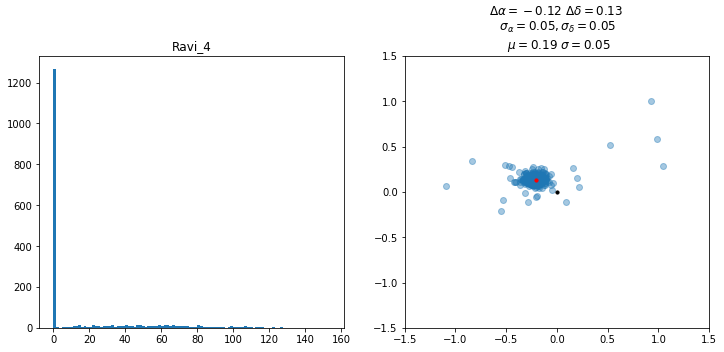

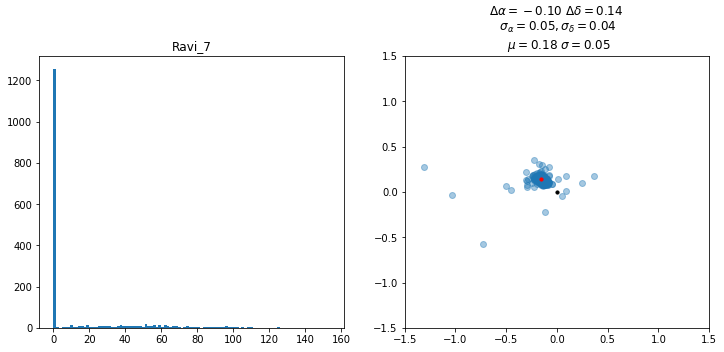

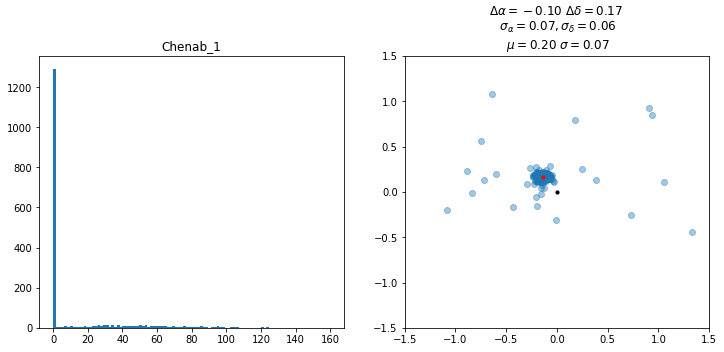

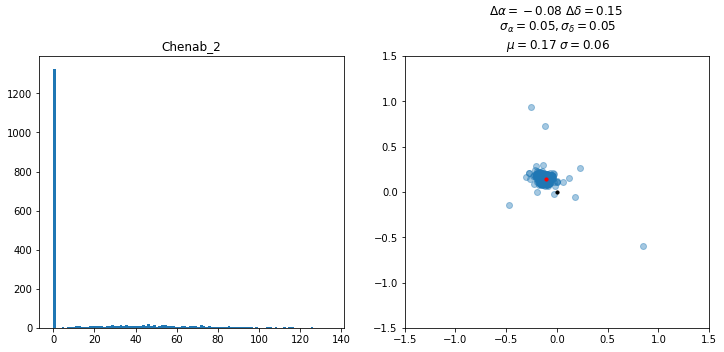

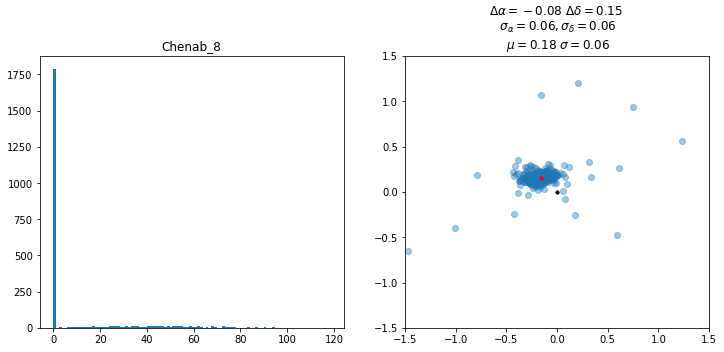

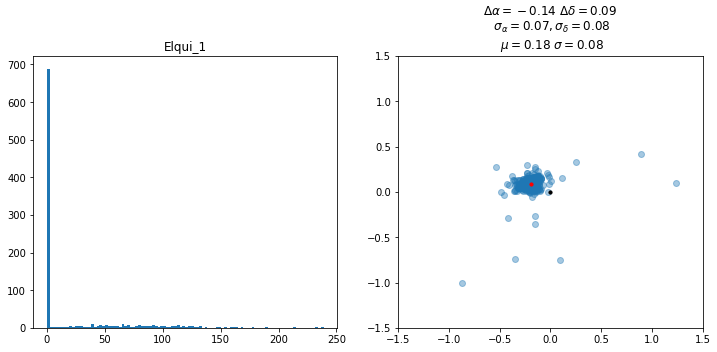

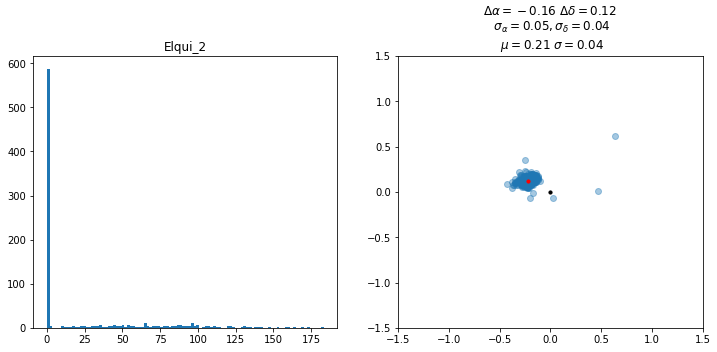

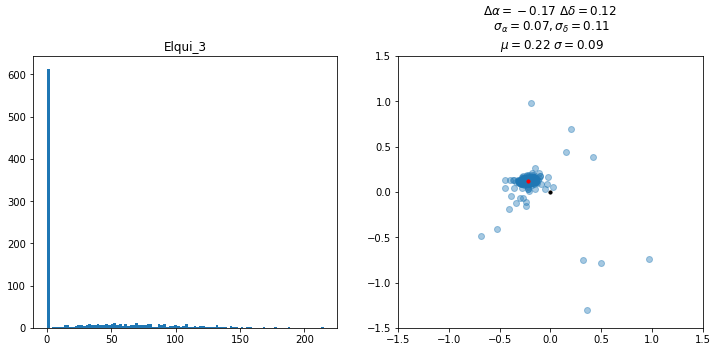

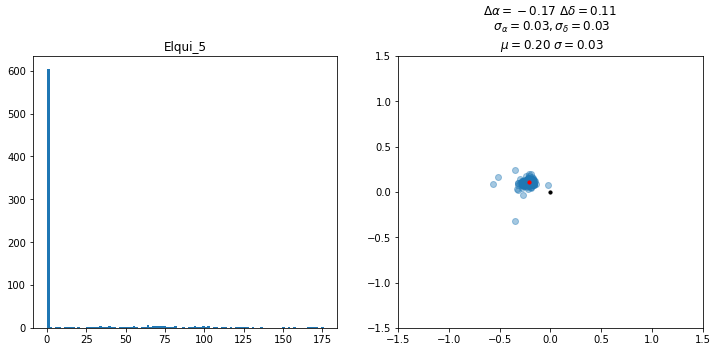

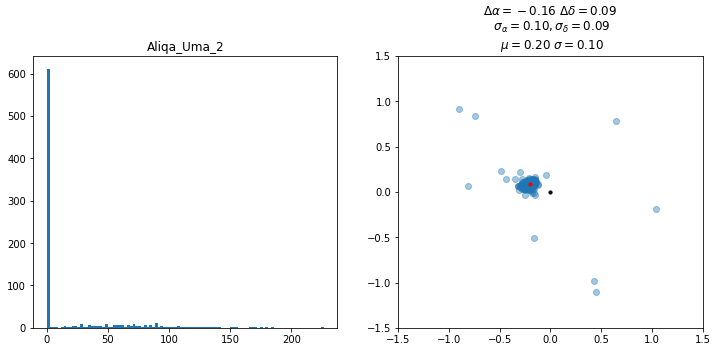

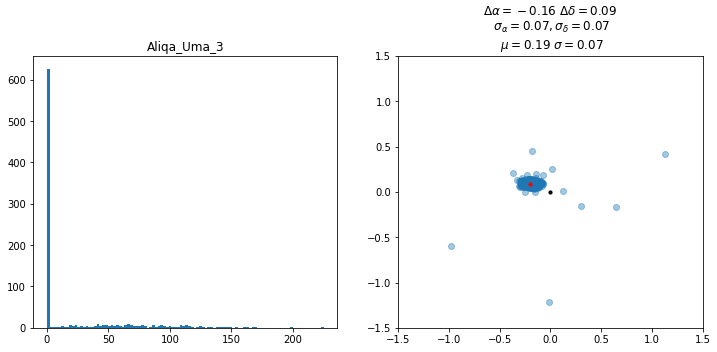

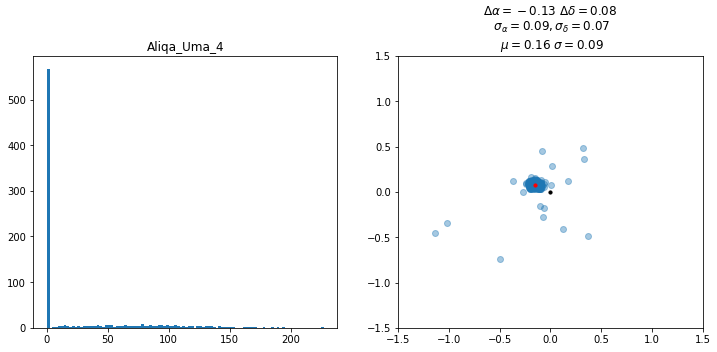

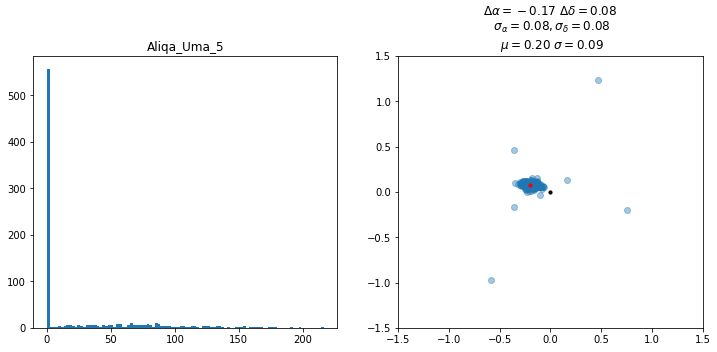

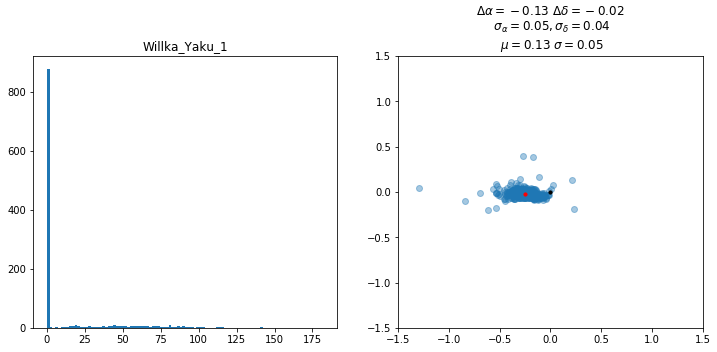

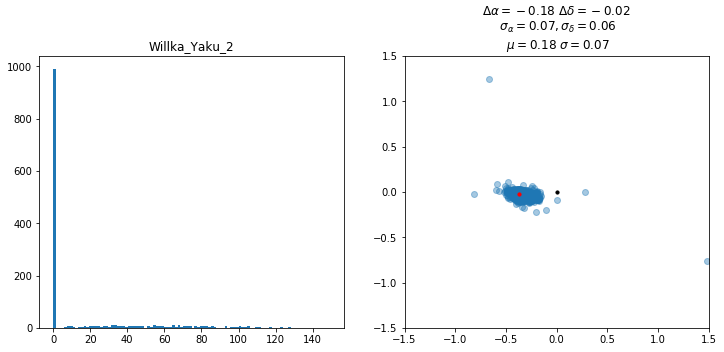

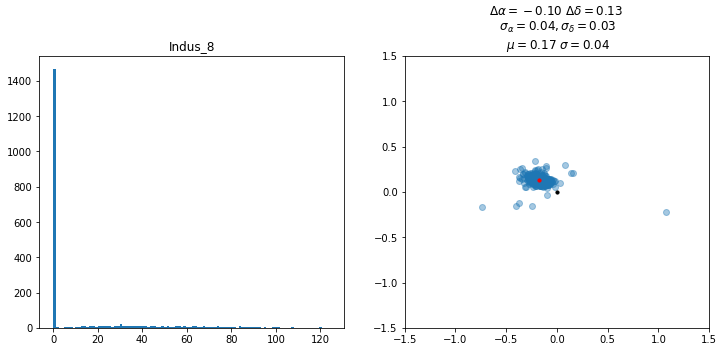

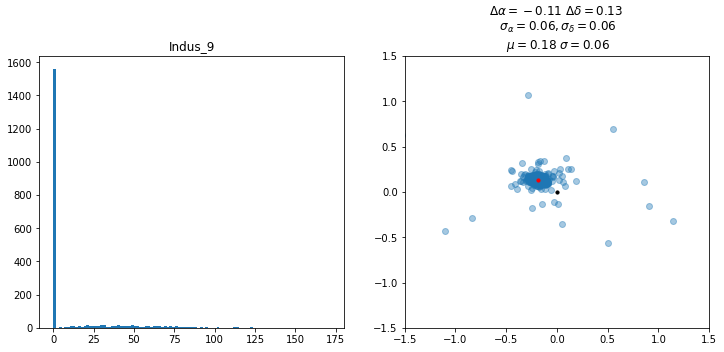

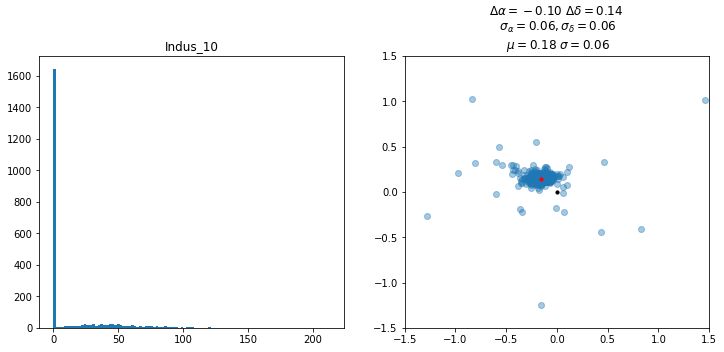

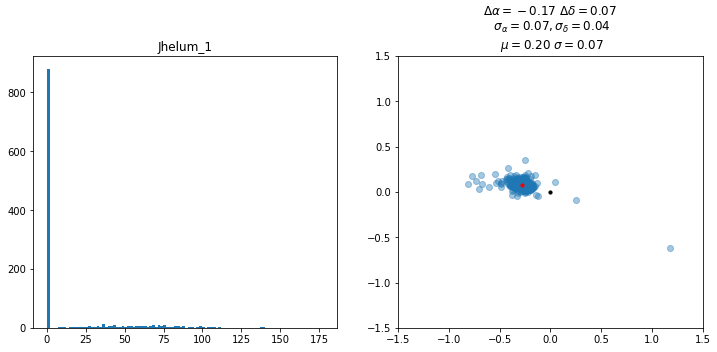

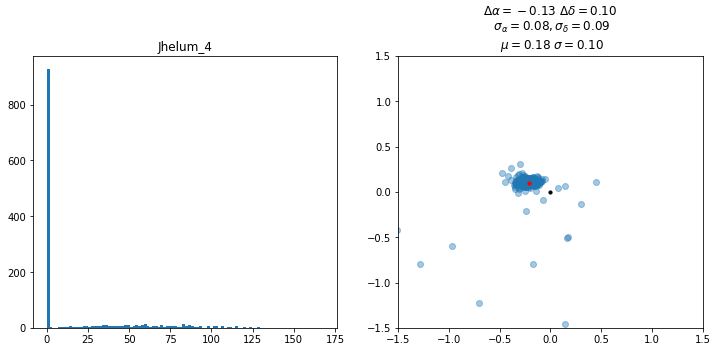

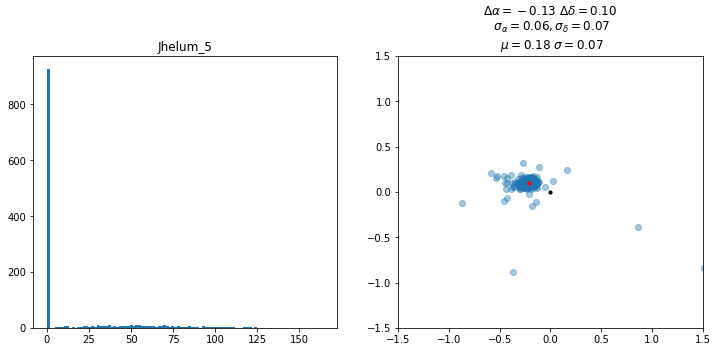

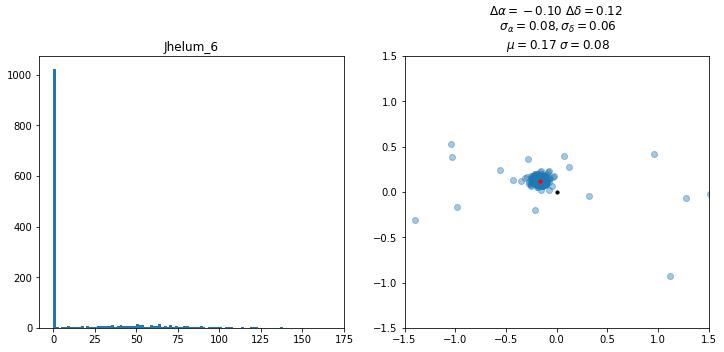

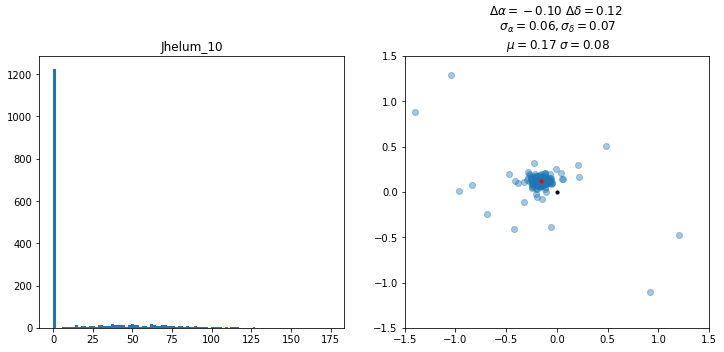

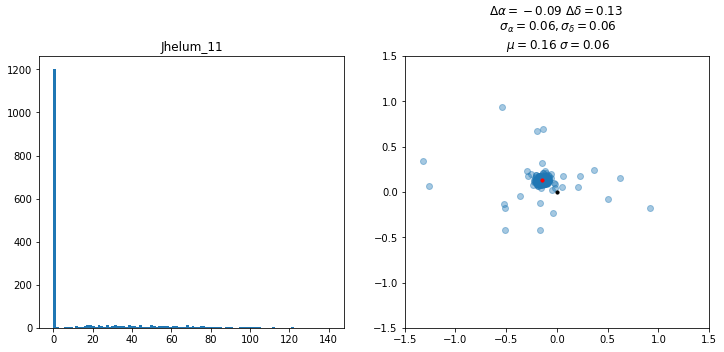

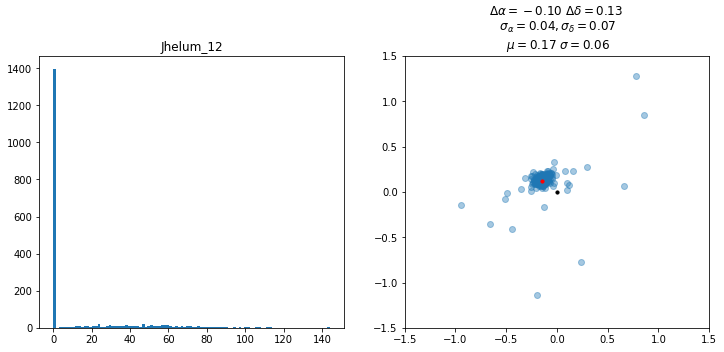

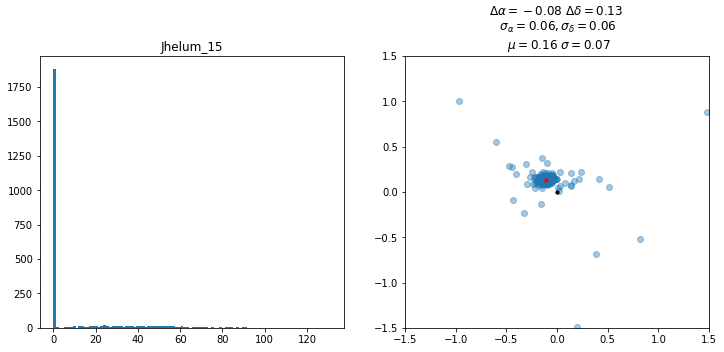

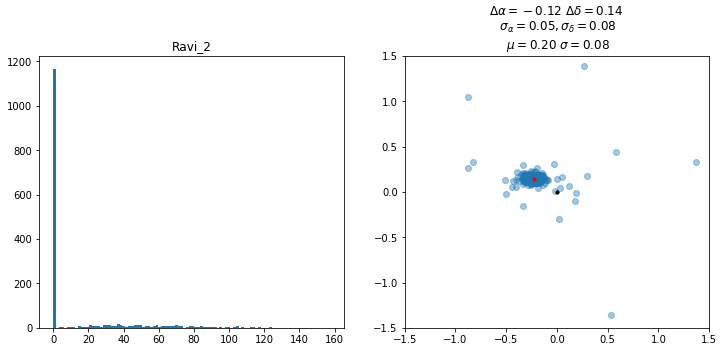

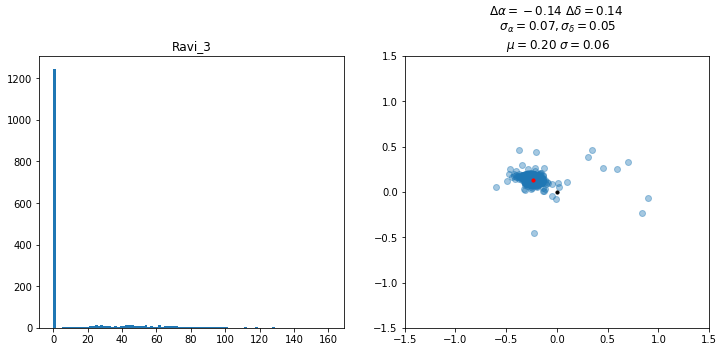

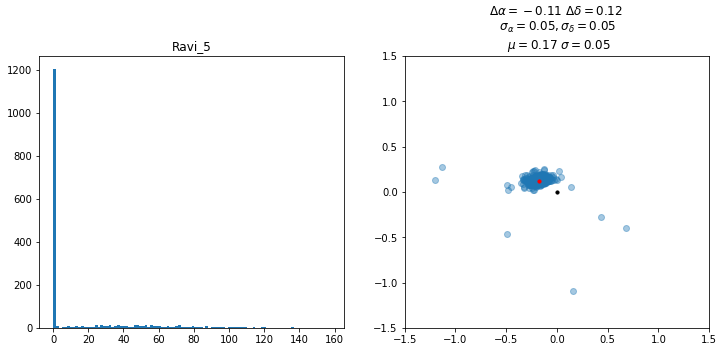

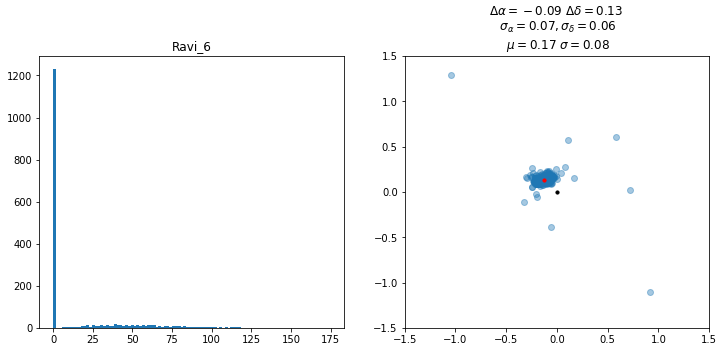

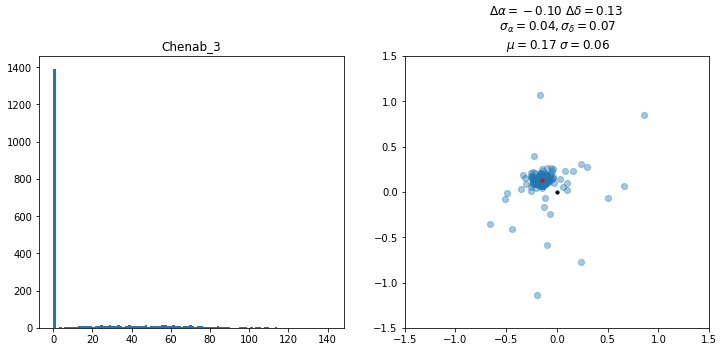

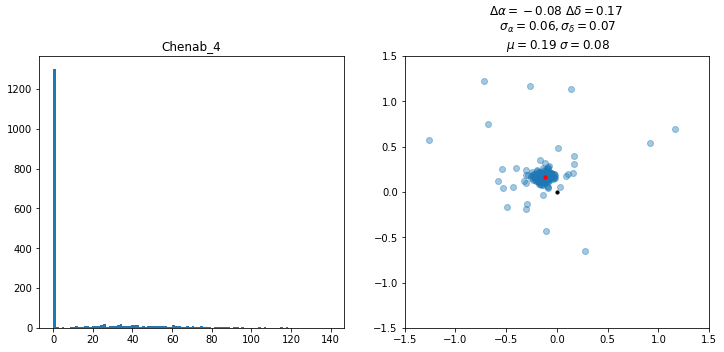

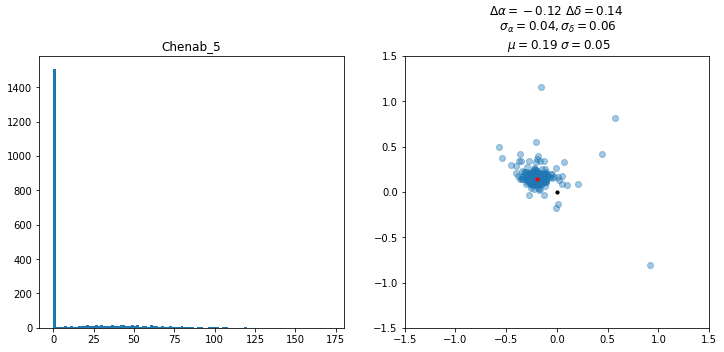

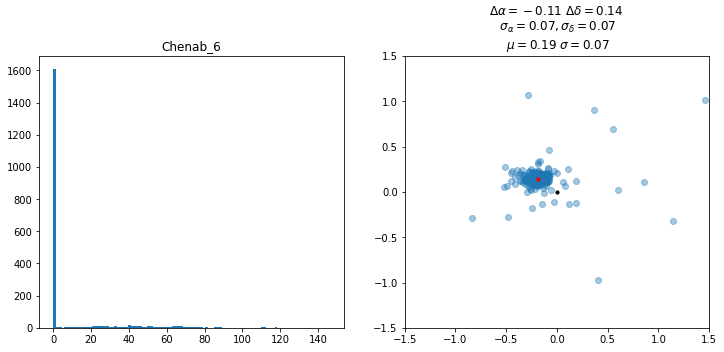

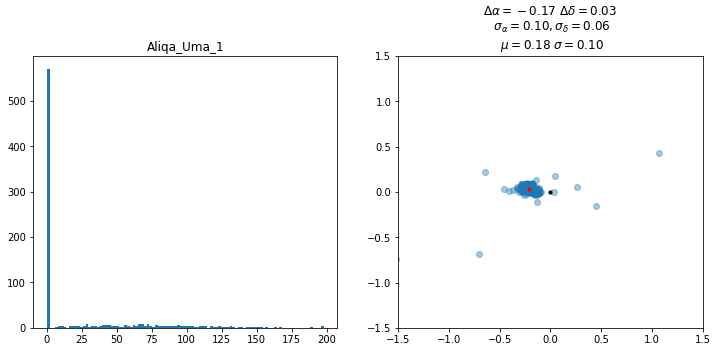

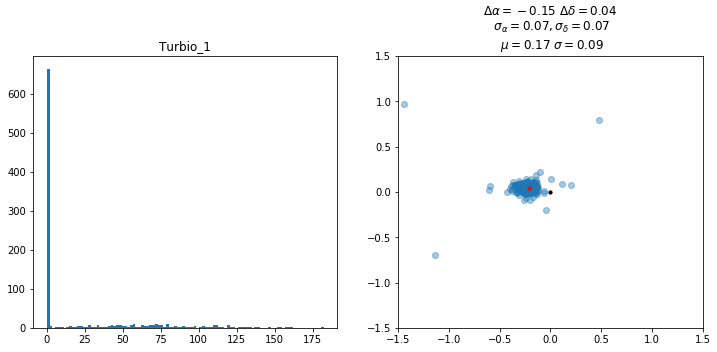

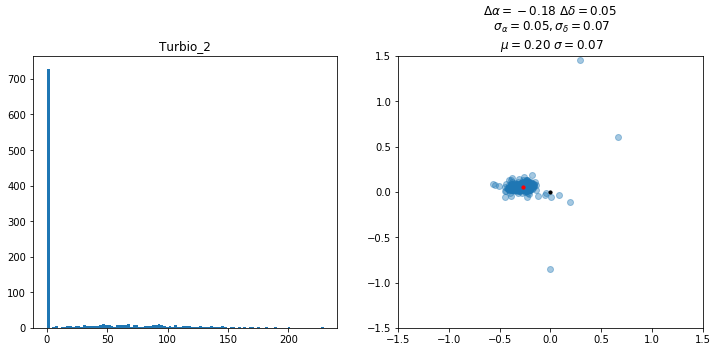

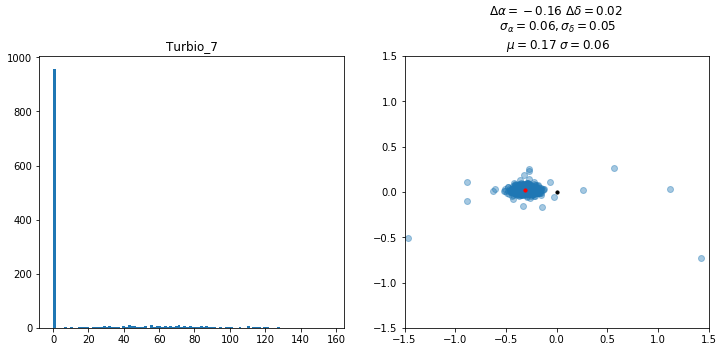

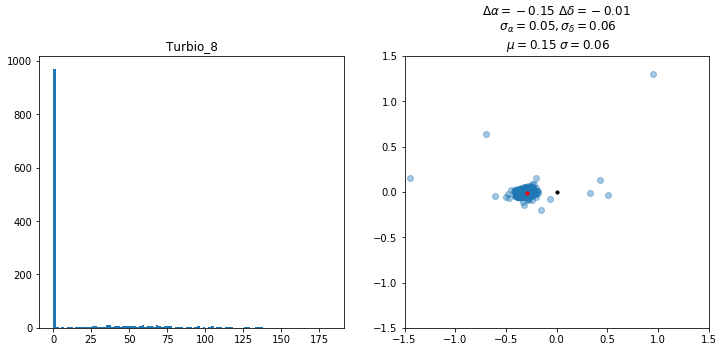

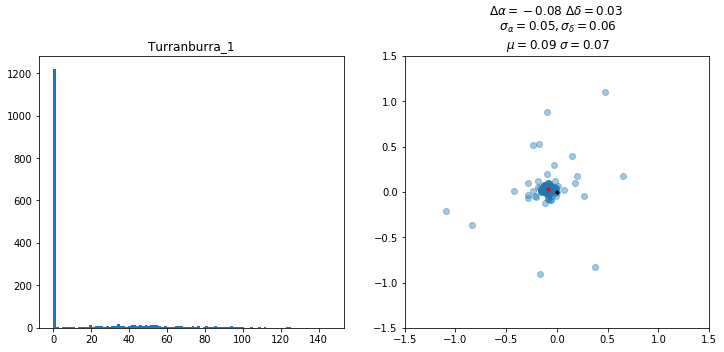

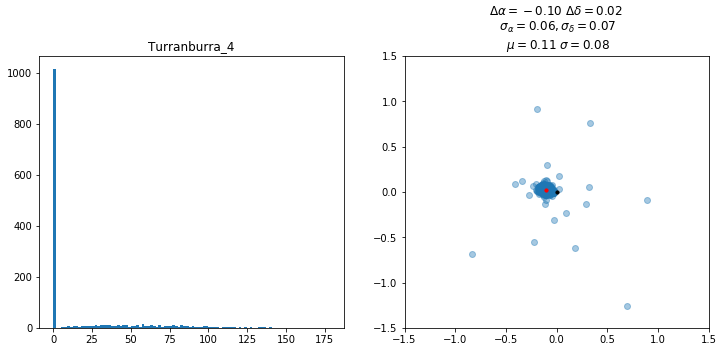

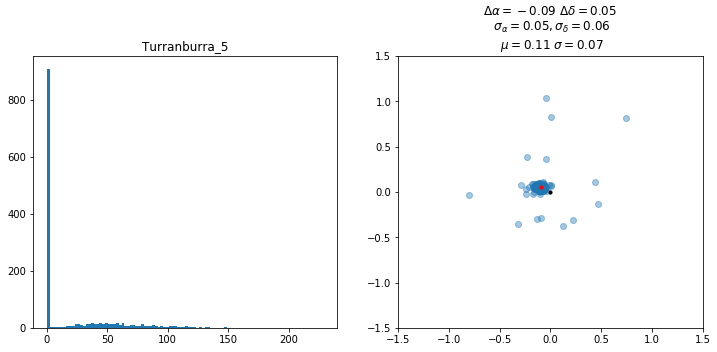

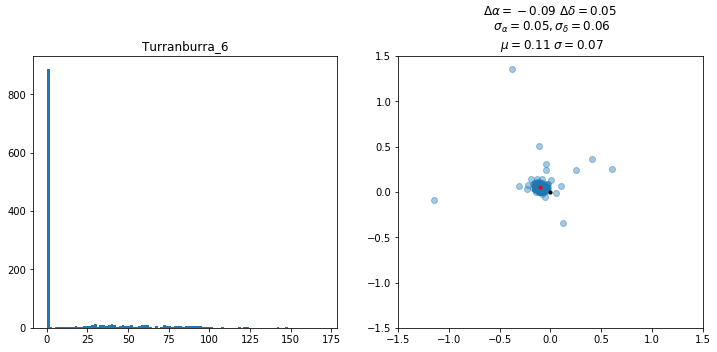

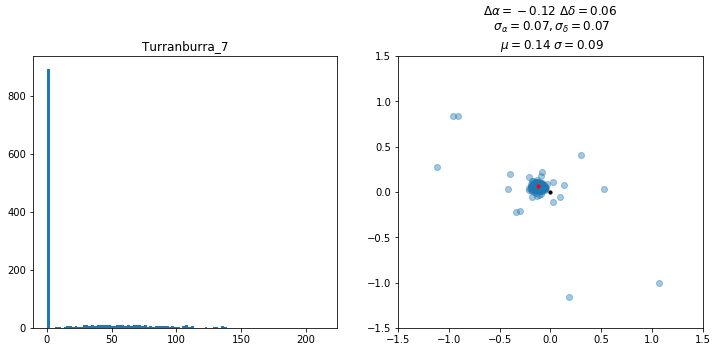

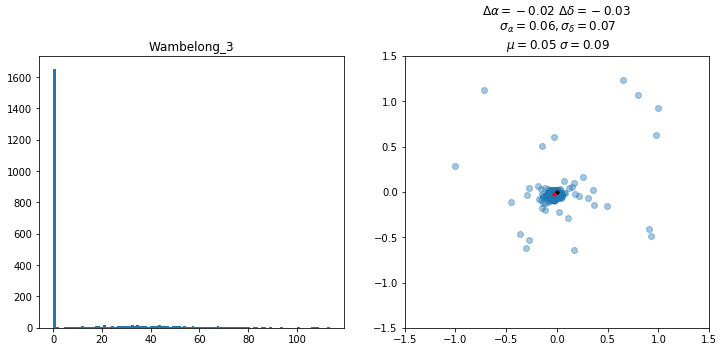

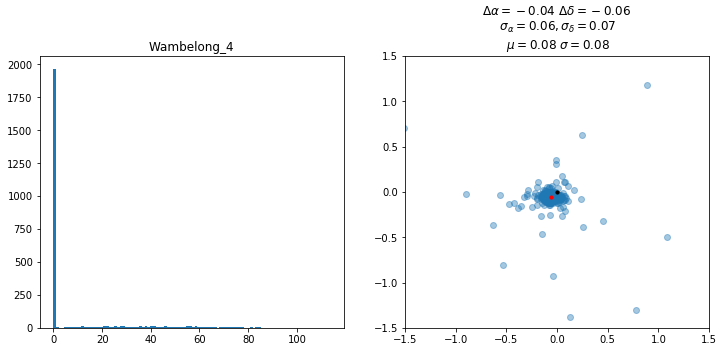

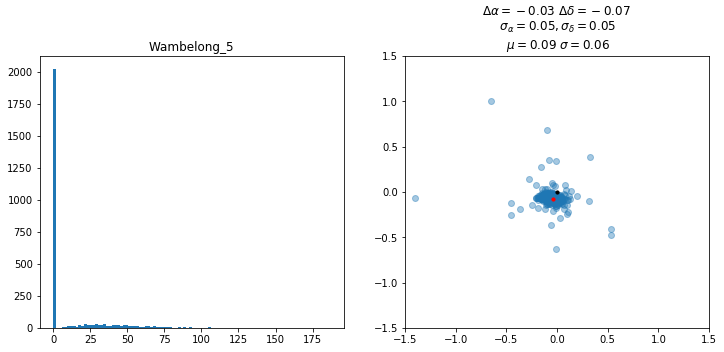

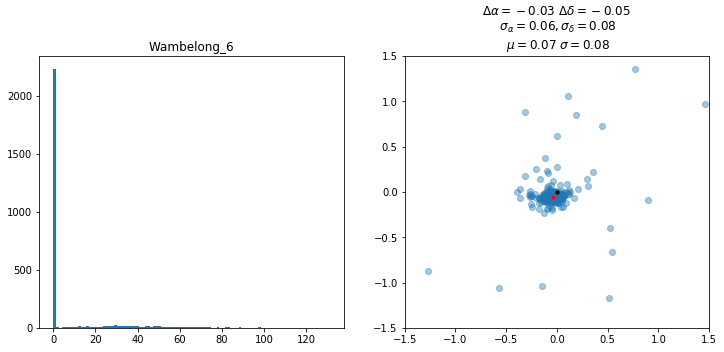

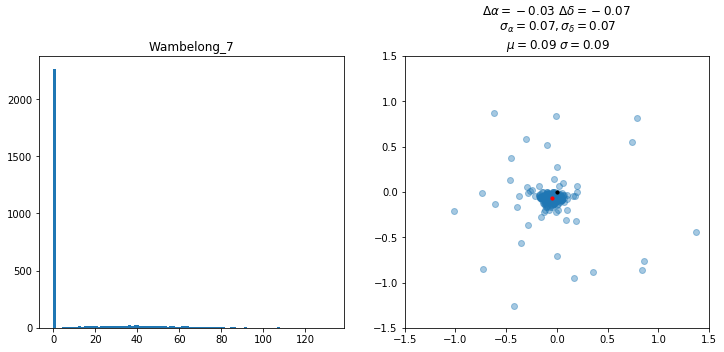

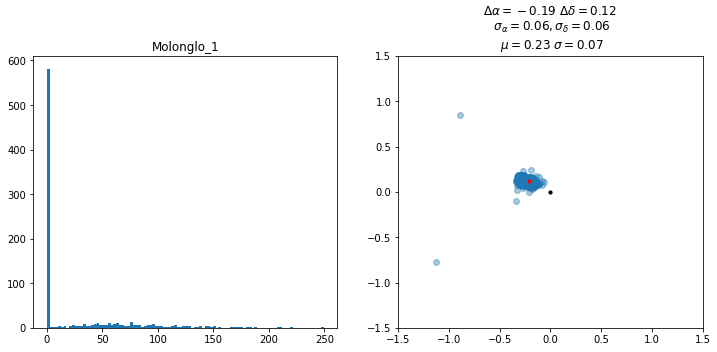

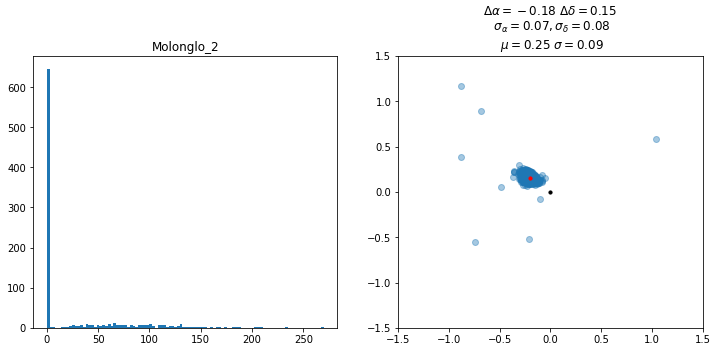

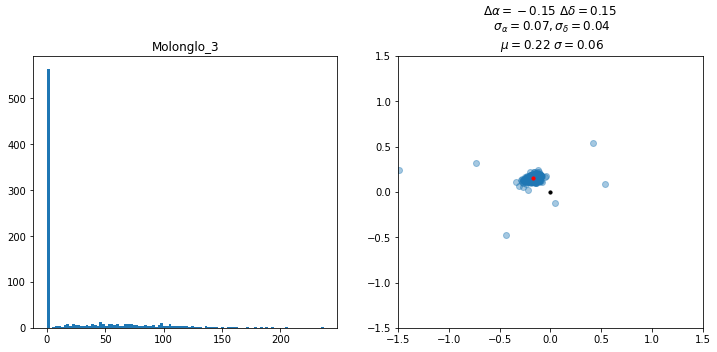

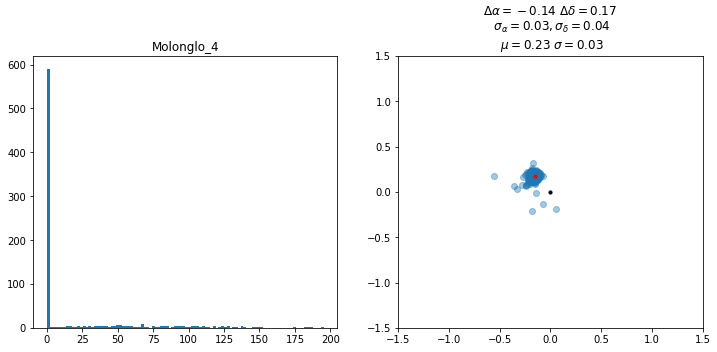

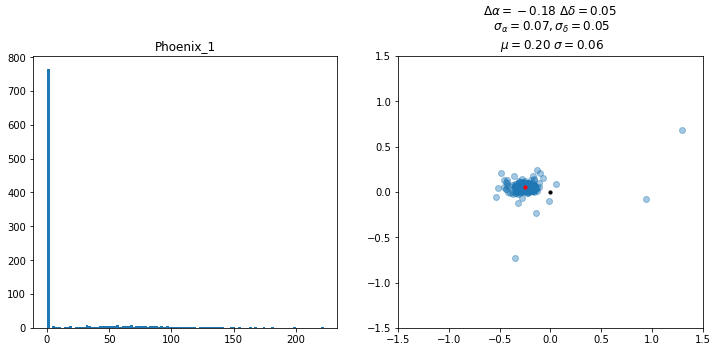

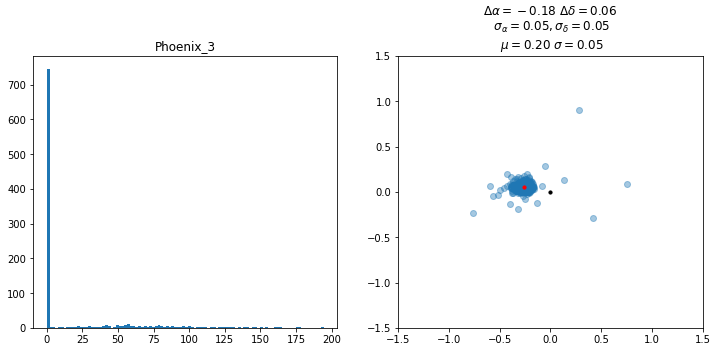

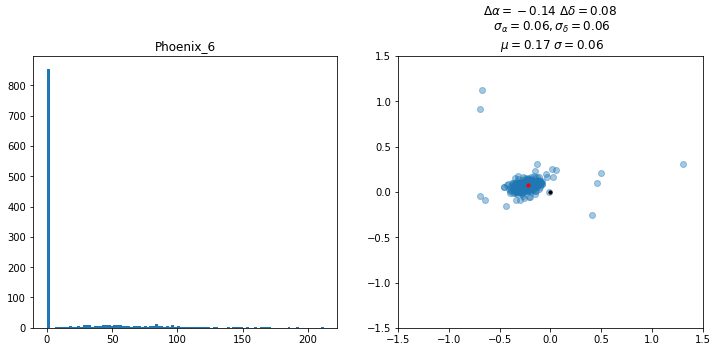

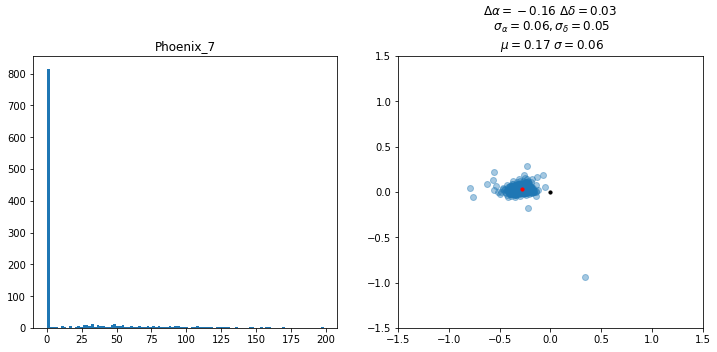

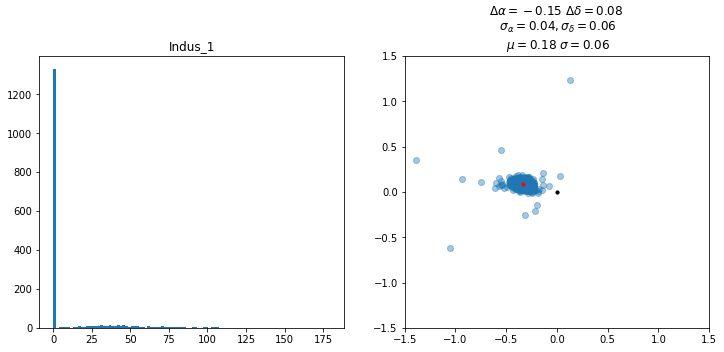

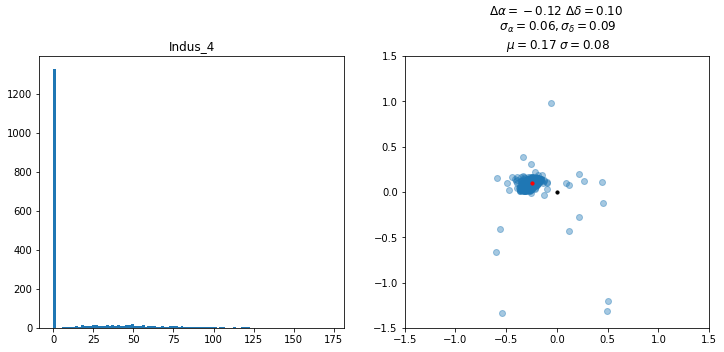

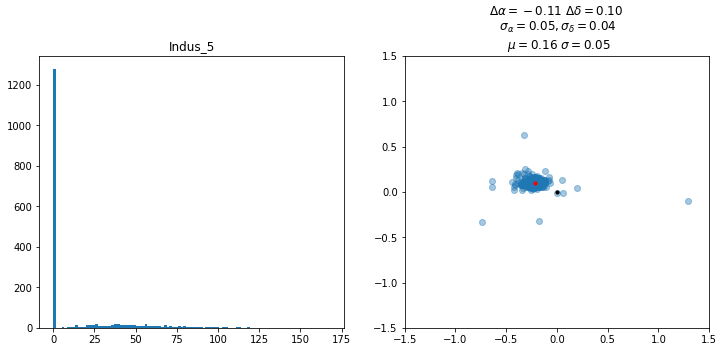

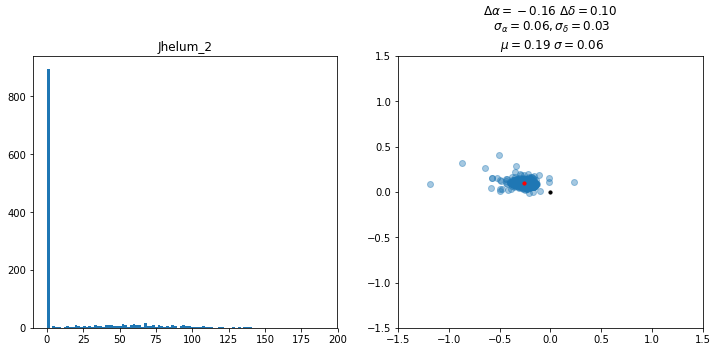

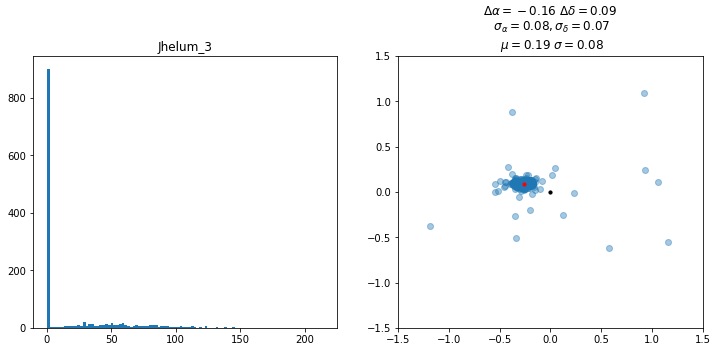

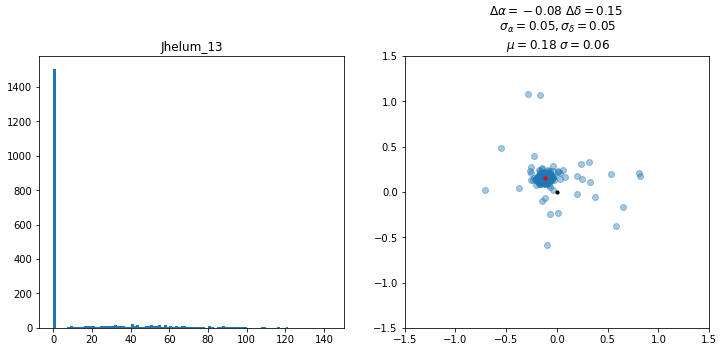

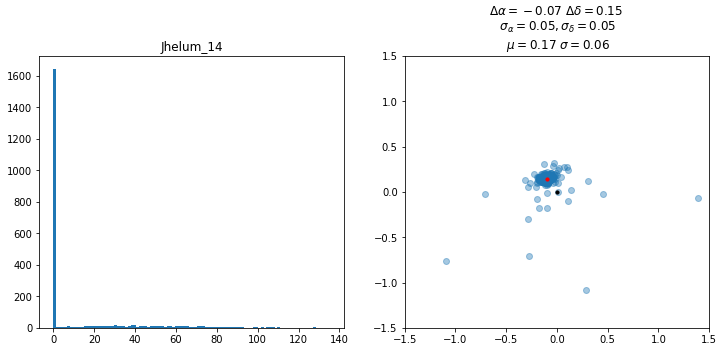

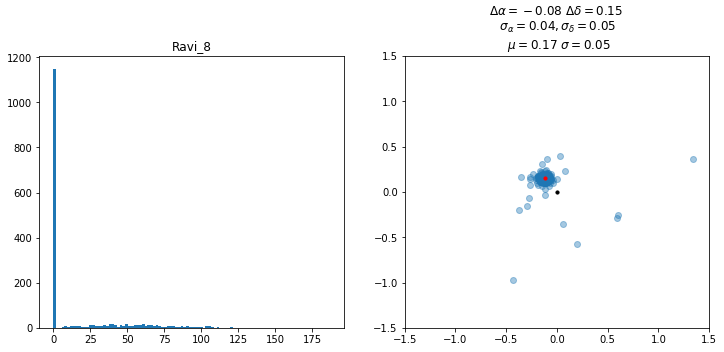

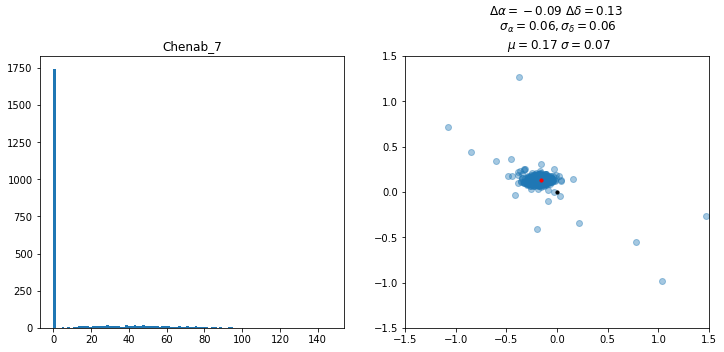

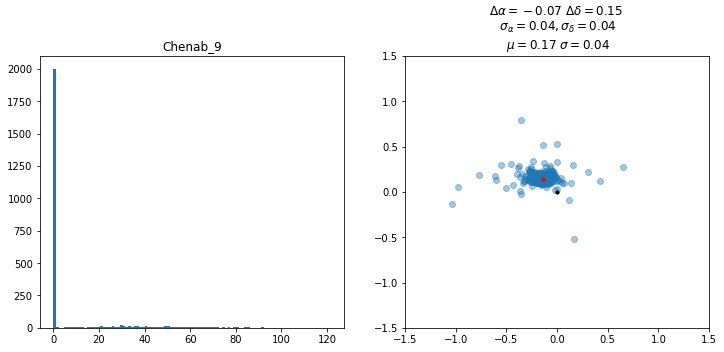

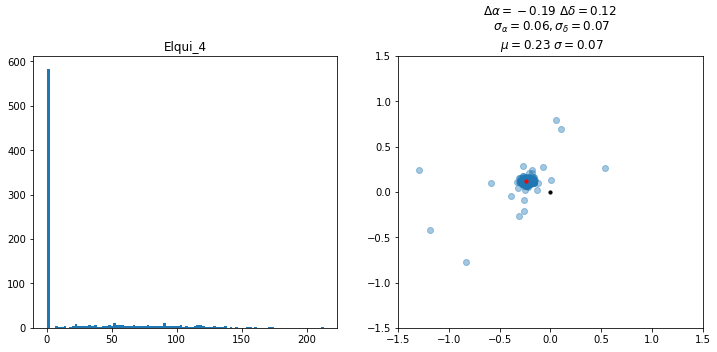

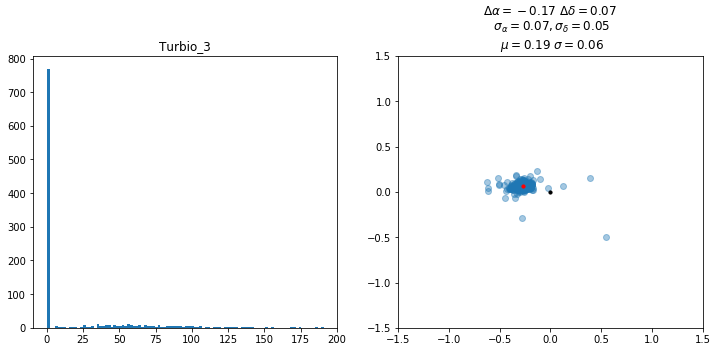

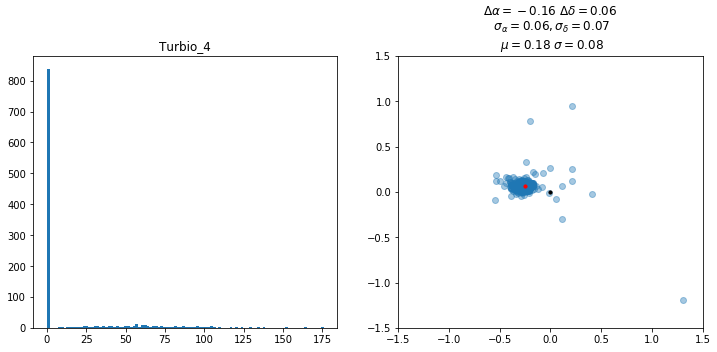

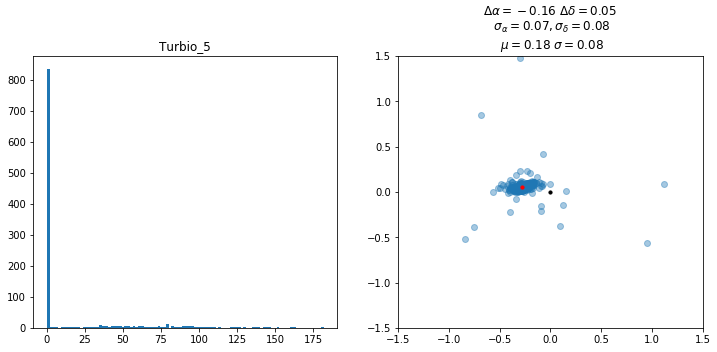

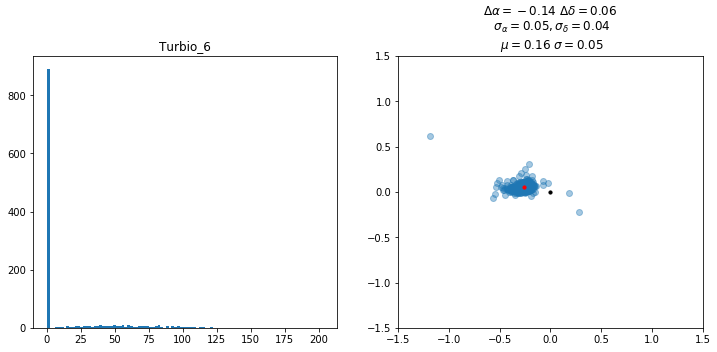

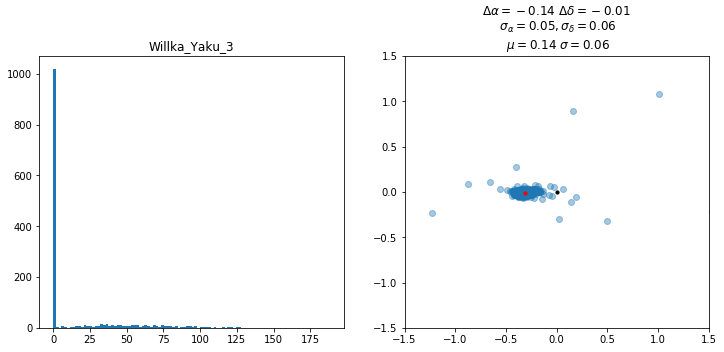

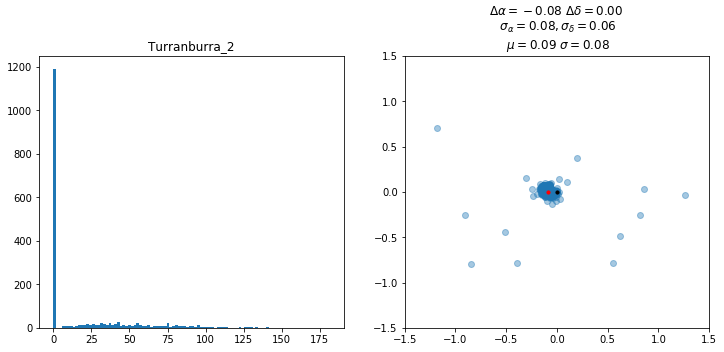

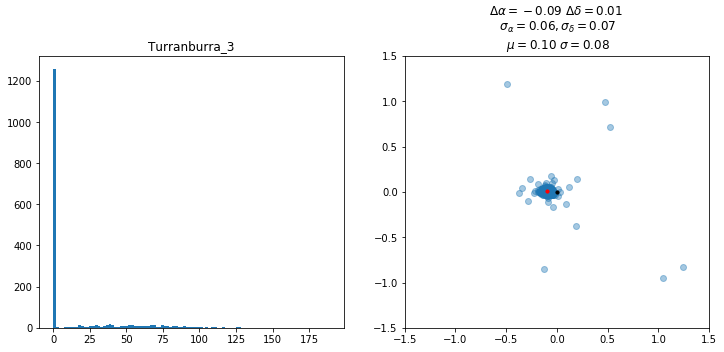

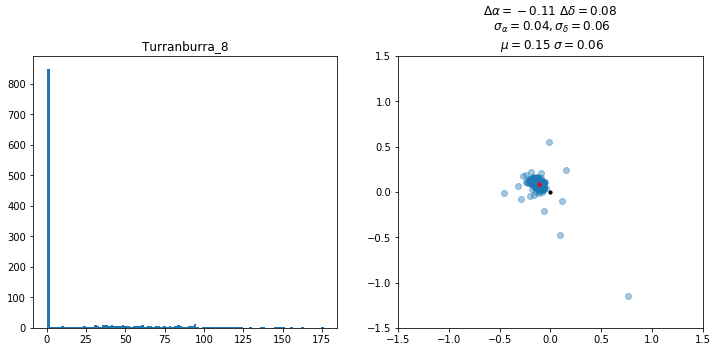

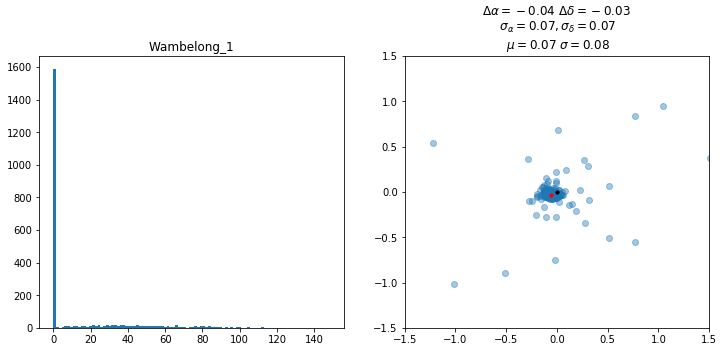

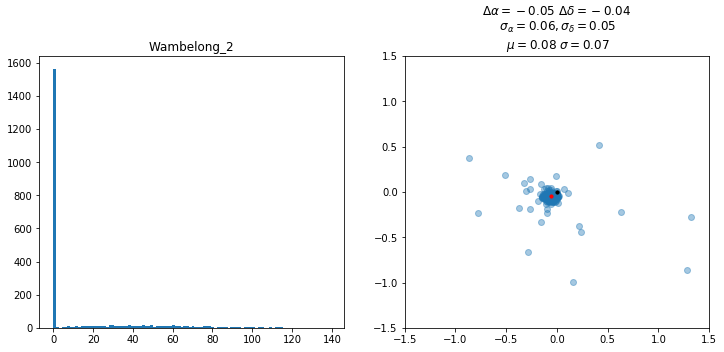

In [242]:
offset_dct = {}
for field in tqdm.tqdm_notebook(fields):
    fnm = field['field_id']
    fn = 'external_catalogs/astrometric/{}_gaia.ecsv'.format(fnm)
    
    if os.path.isfile(fn):
        offset_dct[fnm] = offsets = get_offsets(fnm, fn, doplot=True, biweight=True)
        print('Offsets for', fnm, 'are:', offsets)
    else:
        print('No astrometric catalog', fn,' found')

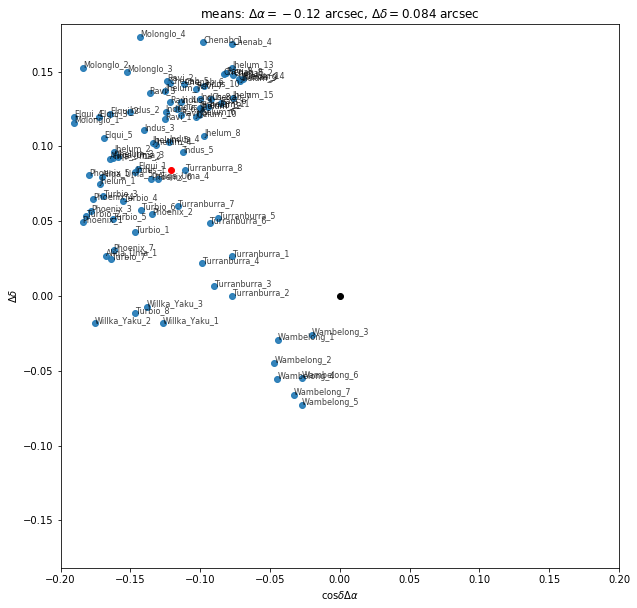

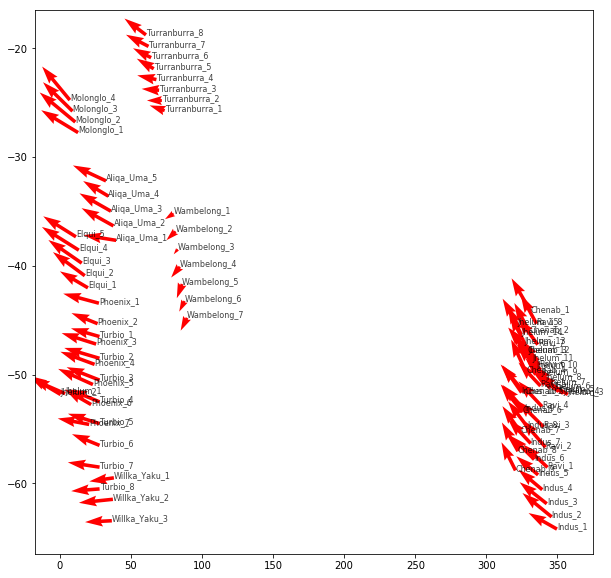

In [266]:
nms = []
ras = []
decs = []
raoffs = []
decoffs = []
for fnm, offsets in offset_dct.items():
    fi = saga_field_catalog.load_single(fnm)
    ras.append(fi['RA'])
    decs.append(fi['Dec'])
    raoffs.append(offsets[1])
    decoffs.append(offsets[2])
    nms.append(fnm)
ras = u.Quantity(ras, u.deg)
decs = u.Quantity(decs, u.deg)
raoffs = u.Quantity(raoffs)
decoffs = u.Quantity(decoffs)

meanra = np.mean(raoffs)
meandec = np.mean(decoffs)

plt.figure(figsize=(10, 10))

for x, y, t in zip(raoffs, decoffs, nms):
    plt.text(x.value, y.value, t, alpha=.75, fontsize=8)
    
plt.scatter(raoffs.value, decoffs.value, alpha=.9)
plt.scatter([meanra.value], [meandec.value], c='r')
plt.scatter([0], [0], c='k')
xmx = np.max(np.abs(raoffs.value))*1.05
ymx = np.max(np.abs(decoffs.value))*1.05
plt.xlim(-xmx, xmx)
plt.ylim(-ymx, ymx)
plt.title(r'means: $\Delta \alpha = {0.value:.2}$ {0.unit}, $\Delta \delta = {1.value:.2}$ {1.unit}'.format(meanra, meandec))
plt.xlabel(r'$\cos{\delta} \Delta \alpha$')
plt.ylabel(r'$\Delta \delta$')


plt.figure(figsize=(10, 10))
for x, y, t in zip(ras, decs, nms):
    plt.text(x.value, y.value, t, alpha=.75, fontsize=8)
plt.quiver(ras.value, decs.value, raoffs.value, decoffs.value, color='r');